##### This table should only be used in conjunction with income statistics produced using the T1 Family File metioned in excel file.

`2007` to `2017`

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110001101

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
family = pd.read_csv("dbFamilyComposition2007-2017.csv")
family.head(3)

In [6]:
family.shape

(4940, 17)

**Exploratory Analysis and Cleaning of data**  ----->`Finding Null valued columns and then droping them `

In [7]:
family.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_DATE                4940 non-null   int64  
 1   GEO                     4940 non-null   object 
 2   DGUID                   4940 non-null   object 
 3   Family type             4940 non-null   object 
 4   Family composition      4940 non-null   object 
 5   Parent characteristics  4940 non-null   object 
 6   UOM                     4940 non-null   object 
 7   UOM_ID                  4940 non-null   int64  
 8   SCALAR_FACTOR           4940 non-null   object 
 9   SCALAR_ID               4940 non-null   int64  
 10  VECTOR                  4940 non-null   object 
 11  COORDINATE              4940 non-null   object 
 12  VALUE                   4940 non-null   float64
 13  STATUS                  0 non-null      float64
 14  SYMBOL                  0 non-null      

In [11]:
family['DECIMALS'].value_counts()

0    3965
1     975
Name: DECIMALS, dtype: int64

In [12]:
family['VECTOR'].value_counts()  # 2 types of values 11 or 10 but not beneficial for analysis

v21215109    11
v21215153    11
v21214717    11
v21214674    11
v21211344    11
             ..
v61625546    10
v61625642    10
v61625671    10
v61625610    10
v61625567    10
Name: VECTOR, Length: 456, dtype: int64

In [15]:
family = family.drop(['STATUS', 'SYMBOL', 'TERMINATED','VECTOR', 'DECIMALS', 'UOM', 'UOM_ID', 'COORDINATE', 'DGUID'], axis = 1)

In [17]:
family.SCALAR_ID.value_counts() # all are zeros ,  will not give any contribution for analysis, drop it

0    4940
Name: SCALAR_ID, dtype: int64

In [18]:
family.SCALAR_FACTOR.value_counts()  # all are same value so not valueable to analysis, drop it

units    4940
Name: SCALAR_FACTOR, dtype: int64

In [19]:
family = family.drop(['SCALAR_ID', 'SCALAR_FACTOR'],axis = 1)

In [22]:
''' Date is from 2007 to 2017'''

' Date is from 2007 to 2017'

In [23]:
family.head()

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
0,2007,"Montréal, Quebec",All families,Families with or without children,All parental age groups,998510.0
1,2008,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1008240.0
2,2009,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1015770.0
3,2010,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1025120.0
4,2011,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1035400.0


In [25]:
family.GEO.value_counts()  # Total number of cities 6 

Edmonton, Alberta                             836
Calgary, Alberta                              836
Vancouver, British Columbia                   836
Montréal, Quebec                              836
Toronto, Ontario                              836
Ottawa - Gatineau, combined Ontario/Quebec    760
Name: GEO, dtype: int64

`Couple family `refers to a family that contains a married or common-law couple. A couple may be of opposite or same sex 
`lone parents` with single parent with his or her children

In [26]:
family['Family type'].value_counts()

All families            1820
Couple families         1820
Lone-parent families    1300
Name: Family type, dtype: int64

In [27]:
family['Family composition'].value_counts()

Families with 3 or more children          780
Families with or without children         780
Average size of families with children    780
Families with 2 children                  780
Families with 1 child                     780
Average family size                       520
Families with no children                 520
Name: Family composition, dtype: int64

In [28]:
family['Parent characteristics'].value_counts() 

Older parent aged 65 years and over    1235
Older parent aged 35 to 44 years       1235
Median total income                    1235
All parental age groups                1235
Name: Parent characteristics, dtype: int64

**Filter data to 3 cities**  `Toronto`, `Calagry`, `Vancouver`

In [90]:
family_toronto = family.loc[family['GEO'] =='Toronto, Ontario']
family_calgary = family.loc[family['GEO'] =='Calgary, Alberta']
family_vancouver = family.loc[family['GEO'] =='Vancouver, British Columbia']

 
family_3city= pd.concat([family_toronto,family_calgary,family_vancouver],axis = 0)
family_3city.head(2)

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
836,2007,"Toronto, Ontario",All families,Families with or without children,All parental age groups,1494090.0
837,2008,"Toronto, Ontario",All families,Families with or without children,All parental age groups,1517790.0


In [30]:
family.isnull().any()   # no null values.

REF_DATE                  False
GEO                       False
Family type               False
Family composition        False
Parent characteristics    False
VALUE                     False
dtype: bool

 **Type of Families**
* `Couple Families` * `Lone Families`

**Exploration of Calgary Family**

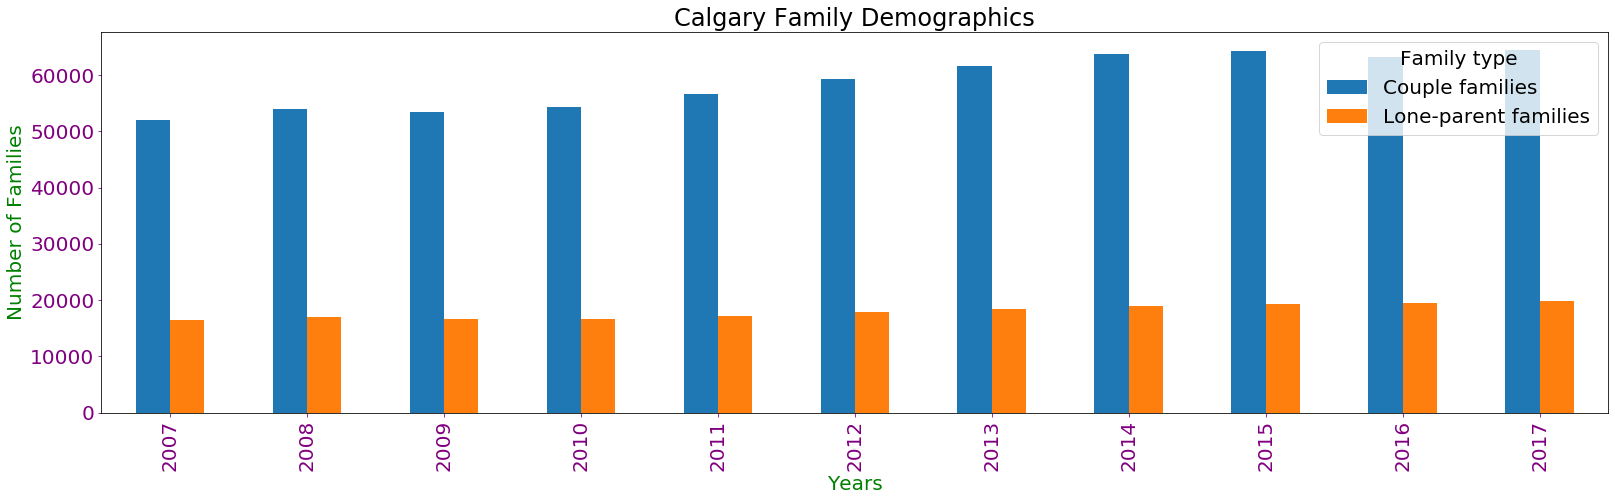

In [92]:
cou_cal = family_calgary[family_calgary['Family type']=='Couple families']
lon_cal = family_calgary[family_calgary['Family type']=='Lone-parent families']
cal_family = pd.concat([cou_cal, lon_cal],axis = 0)
cal_family

table_cal = cal_family.pivot_table(index = 'REF_DATE', columns = 'Family type',values = 'VALUE')
ax7 = table_cal.plot(kind ='bar', title = 'Calgary Family Demographics', figsize = (27,7) )
ax7.set_ylabel("Number of Families")
ax7.set_xlabel("Years")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

ax7.xaxis.label.set_color("green")
ax7.yaxis.label.set_color("green")

ax7 = plt.gca()
ax7.tick_params(axis='x', colors='purple')
ax7.tick_params(axis='y', colors='purple')

**Exploration of Vancouver Family**

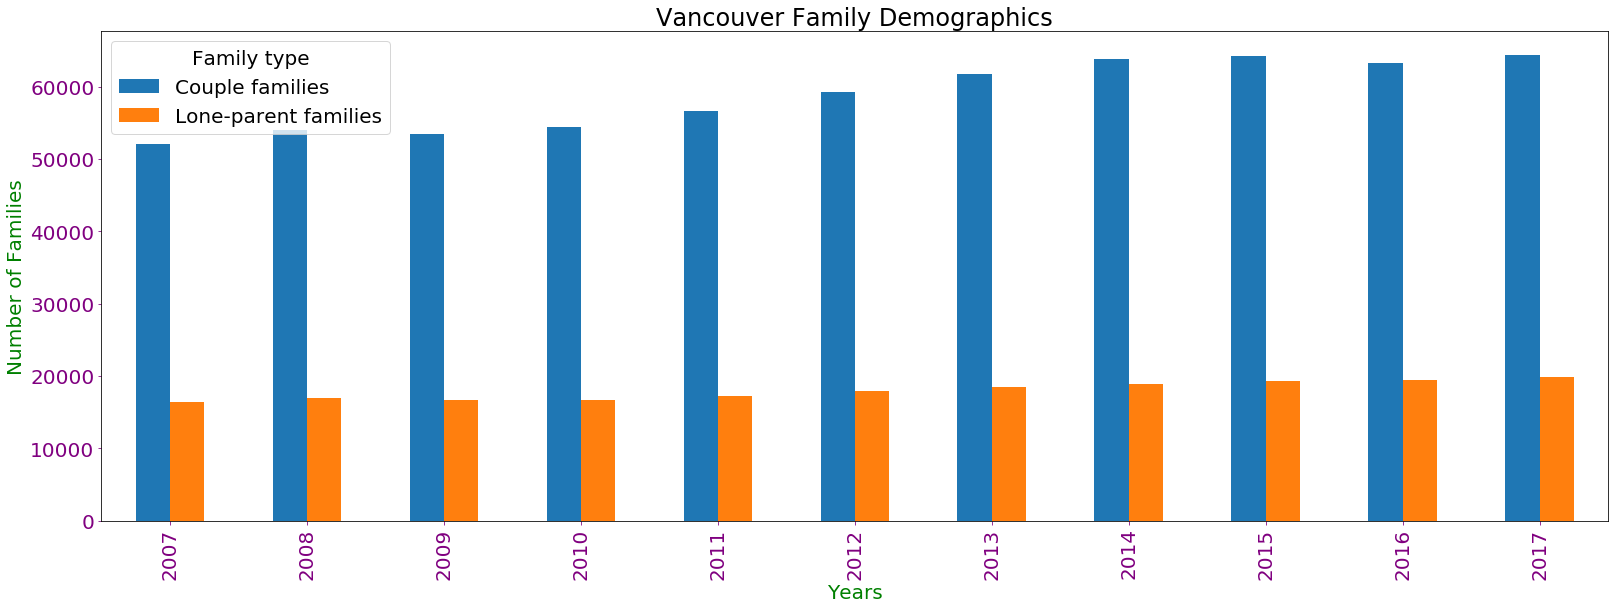

In [32]:
cou_van = family_vancouver[family_vancouver['Family type']=='Couple families']
lon_van = family_vancouver[family_vancouver['Family type']=='Lone-parent families']
van_family = pd.concat([cou_cal, lon_cal],axis = 0)
van_family

table_von = van_family.pivot_table(index = 'REF_DATE', columns = 'Family type',values = 'VALUE')
ax9 = table_von.plot(kind ='bar', title = 'Vancouver Family Demographics', figsize = (27,9) )
ax9.set_ylabel("Number of Families")
ax9.set_xlabel("Years")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

ax9.xaxis.label.set_color("green")
ax9.yaxis.label.set_color("green")

ax9 = plt.gca()
ax9.tick_params(axis='x', colors='purple')
ax9.tick_params(axis='y', colors='purple')

* **Exploration of Toronto Family**

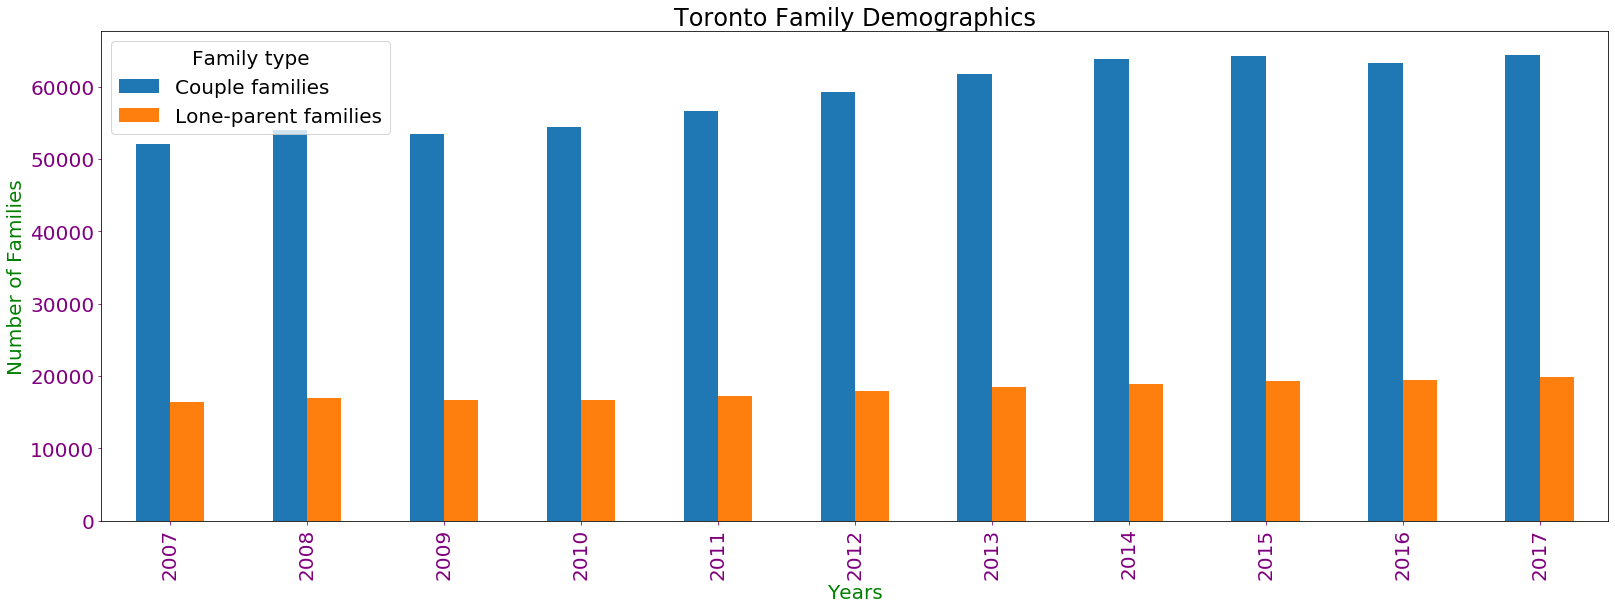

In [33]:
cou_ton = family_toronto[family_toronto['Family type']=='Couple families']
lon_ton = family_toronto[family_toronto['Family type']=='Lone-parent families']
ton_family = pd.concat([cou_cal, lon_cal],axis = 0)
ton_family

table_ton = ton_family.pivot_table(index = 'REF_DATE', columns = 'Family type',values = 'VALUE')
ax10 = table_ton.plot(kind ='bar', title = 'Toronto Family Demographics', figsize = (27,9) )
ax10.set_ylabel("Number of Families")
ax10.set_xlabel("Years")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

ax10.xaxis.label.set_color("green")
ax10.yaxis.label.set_color("green")

ax10 = plt.gca()
ax10.tick_params(axis='x', colors='purple')
ax10.tick_params(axis='y', colors='purple')

**Couple Families (`married and common-law Partners or same sex patners`) increase from 2007 to 2017   in all 3  cities   (Toronto, Calgary, Vancouver)             but not much increase in lone Parent(`single parent`) over the years**

**Exloration of `Families` with `presence of Children` in all 3 Cities**

**Lone families without children are not present.**

In [34]:
family['Family composition'].isnull().sum()
family['Family type'].isnull().sum()
family['VALUE'].isnull().sum()

0

* **Filteration in `Family Composition`**

* `Toronto Family` * `with presence of Children`

In [36]:
children1 = family_toronto.loc[family_toronto['Family composition']=='Families with 1 child']
children2 = family_toronto.loc[family_toronto['Family composition']=='Families with 2 children']
children3 = family_toronto.loc[family_toronto['Family composition']=='Families with 3 or more children']
children0 = family_toronto.loc[family_toronto['Family composition']=='Families with no children']


df_ton = pd.concat([children1,children2,children3, children0], axis = 0)

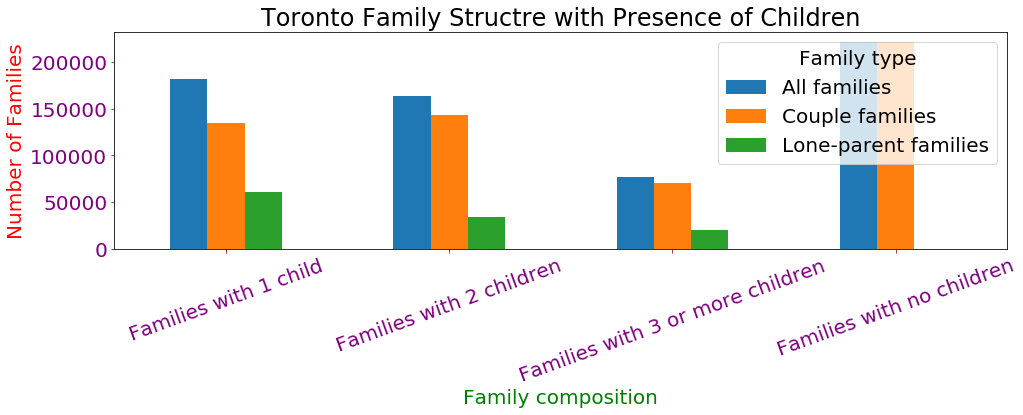

In [37]:
toronto_family = pd.pivot_table(df_ton, index ='Family composition', columns = 'Family type' , values = 'VALUE',aggfunc='mean' )
ax12 = toronto_family.plot( kind = 'bar', title = "Toronto Family Structre with Presence of Children",figsize = (16,4),
                        rot = '20')
ax12.set_ylabel("Number of Families")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

ax12.xaxis.label.set_color("green")
ax12.yaxis.label.set_color("red")

ax12 = plt.gca()
ax12.tick_params(axis='x', colors='purple')
ax12.tick_params(axis='y', colors='purple')

# The graph shows that Families with 3 or more than 3 children are  less whether they are couple or lone families.

`Vancouver Family` with Presence of Children 

In [38]:
child_1 = family_vancouver.loc[family_vancouver['Family composition']=='Families with 1 child']
child_2 = family_vancouver.loc[family_vancouver['Family composition']=='Families with 2 children']
child_3 = family_vancouver.loc[family_vancouver['Family composition']=='Families with 3 or more children']
child_0 = family_vancouver.loc[family_vancouver['Family composition']=='Families with no children']

df_van = pd.concat([child_1,child_2,child_3,child_0], axis = 0)

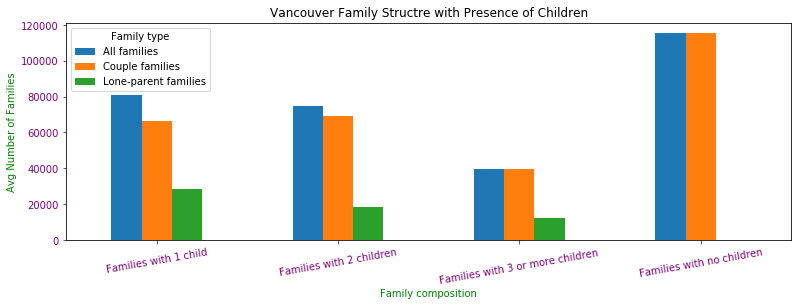

In [39]:
vancouver_table = pd.pivot_table(df_van, index = 'Family composition', columns = 'Family type', values= 'VALUE', aggfunc  ='mean')
ax_van = vancouver_table.plot(kind = 'bar',title = "Vancouver Family Structre with Presence of Children",figsize = (13,4),rot='10')
ax_van.set_ylabel("Avg Number of Families")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

ax_van.xaxis.label.set_color("green")
ax_van.yaxis.label.set_color("green")

ax_van = plt.gca()
ax_van.tick_params(axis='x', colors='purple')
ax_van.tick_params(axis='y', colors='purple')

`Calgary Family` with presence of Children`**

In [40]:
child_1 = family_calgary.loc[family_calgary['Family composition']=='Families with 1 child']
child_2 = family_calgary.loc[family_calgary['Family composition']=='Families with 2 children']
child_3 = family_calgary.loc[family_calgary['Family composition']=='Families with 3 or more children']
child_0 = family_calgary.loc[family_calgary['Family composition']=='Families with no children']

df_cal = pd.concat([child_1, child_2, child_3, child_0], axis  = 0)

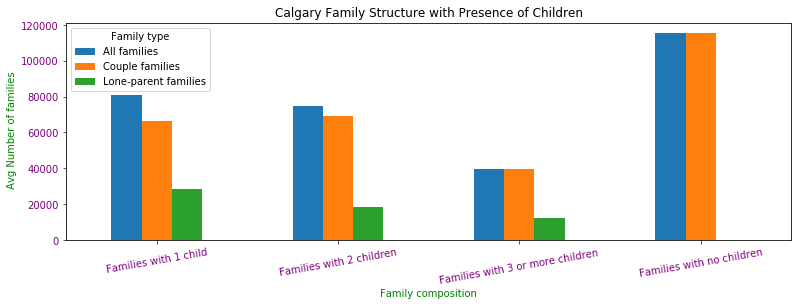

In [41]:
calgary_table = pd.pivot_table(df_cal, index = 'Family composition', columns = 'Family type',values = 'VALUE')
ax_cal = vancouver_table.plot(kind = 'bar',title = "Calgary Family Structure with Presence of Children",figsize = (13,4),rot='10')
ax_cal.set_ylabel(" Avg Number of families")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

ax_cal.xaxis.label.set_color("green")
ax_cal.yaxis.label.set_color("green")

ax_cal = plt.gca()
ax_cal.tick_params(axis='x', colors='purple')
ax_cal.tick_params(axis='y', colors='purple')

`Families_with_Children` and `Families with no children` in all Cities (`Toronto`,`Calgary`,`Vancouver`)

In [42]:
df_1 = df_cal.loc[(df_cal['Family type'] == 'Couple families') & (df_cal['Family composition'] == 'Families with 1 child')]
df_2=  df_cal.loc[(df_cal['Family type'] == 'Couple families') & (df_cal['Family composition'] == 'Families with 2 children')]
df_3 = df_cal.loc[(df_cal['Family type'] == 'Couple families') & (df_cal['Family composition'] == 'Families with 3 or more children')]
df_no = df_cal.loc[(df_cal['Family type'] == 'Couple families') & (df_cal['Family composition'] == 'Families with no children')]

df_with_cal_children = pd.concat([df_1,df_2,df_3], axis = 0)
                                                               

In [43]:
df_with_cal_children

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
2068,2007,"Calgary, Alberta",Couple families,Families with 1 child,All parental age groups,58910.0
2069,2008,"Calgary, Alberta",Couple families,Families with 1 child,All parental age groups,60910.0
2070,2009,"Calgary, Alberta",Couple families,Families with 1 child,All parental age groups,62230.0
2071,2010,"Calgary, Alberta",Couple families,Families with 1 child,All parental age groups,63670.0
2072,2011,"Calgary, Alberta",Couple families,Families with 1 child,All parental age groups,65210.0
...,...,...,...,...,...,...
2195,2013,"Calgary, Alberta",Couple families,Families with 3 or more children,Median total income,120060.0
2196,2014,"Calgary, Alberta",Couple families,Families with 3 or more children,Median total income,123360.0
2197,2015,"Calgary, Alberta",Couple families,Families with 3 or more children,Median total income,124150.0
2198,2016,"Calgary, Alberta",Couple families,Families with 3 or more children,Median total income,117890.0


In [44]:
''' Median total income ----> means exactly half of the income reported is greater than Total income.'''

' Median total income ----> means exactly half of the income reported is greater than Total income.'

**In all 3 cities Families with 3 or more children are less in number whether they belong to couple or Lone Family.**

* \ `Exploration` of   `Income` According to `Family Structure` and `Age`

In [45]:
df = pd.pivot_table(df_ton, index = ['Family composition', 'Parent characteristics'], columns = 'Family type', values = 'VALUE')
df
# Lone parents family with no children Income information is missing.

Family type                                                            All families  \
Family composition               Parent characteristics                               
Families with 1 child            All parental age groups              475362.727273   
                                 Median total income                   70174.545455   
                                 Older parent aged 35 to 44 years     105215.454545   
                                 Older parent aged 65 years and over   75178.181818   
Families with 2 children         All parental age groups              406074.545455   
                                 Median total income                   91325.454545   
                                 Older parent aged 35 to 44 years     141464.545455   
                                 Older parent aged 65 years and over   16901.818182   
Families with 3 or more children All parental age groups              163531.818182   
                                 Median total income                   81208.181818   
                                 Older parent aged 35 to 44 years      61381.818182   
                                 Older parent aged 65 years and over    3666.363636   
Families with no children        All parental age groups              552713.636364   
                                 Median total income                   60882.727273   
                                 Older parent aged 35 to 44 years      66842.727273   
                                 Older parent aged 65 years and over  204351.818182   

Family type                                                           Couple families  \
Family composition               Parent characteristics                                 
Families with 1 child            All parental age groups                329608.181818   
                                 Median total income                     87927.272727   
                                 Older parent aged 35 to 44 years        74970.000000   
                                 Older parent aged 65 years and over     46329.090909   
Families with 2 children         All parental age groups                340731.818182   
                                 Median total income                    102298.181818   
                                 Older parent aged 35 to 44 years       119397.272727   
                                 Older parent aged 65 years and over     12540.909091   
Families with 3 or more children All parental age groups                137391.818182   
                                 Median total income                     92809.090909   
                                 Older parent aged 35 to 44 years        49737.272727   
                                 Older parent aged 65 years and over      3034.545455   
Families with no children        All parental age groups                552713.636364   
                                 Median total income                     60882.727273   
                                 Older parent aged 35 to 44 years        66842.727273   
                                 Older parent aged 65 years and over    204351.818182   

Family type                                                           Lone-parent families  
Family composition               Parent characteristics                                     
Families with 1 child            All parental age groups                     145755.454545  
                                 Median total income                          40425.454545  
                                 Older parent aged 35 to 44 years             30248.181818  
                                 Older parent aged 65 years and over          28848.181818  
Families with 2 children         All parental age groups                      65343.636364  
                                 Median total income                          43898.181818  
                                 Older parent aged 35 to 44 years             22064.54

In [46]:
''' Total Income means income from all Sources. 
Where a median income, for example, is given as $26,000, it means that exactly half of the incomes reported are greater
than or equal to $26,000, and that the other half is less than or equal to the median amount
Children are tax filers or imputed persons in couple and lone-parent families. Tax filing children do not live with
their spouse, have no children of their own and live with their parent(s)'''

' Total Income means income from all Sources. \nWhere a median income, for example, is given as $26,000, it means that exactly half of the incomes reported are greater\nthan or equal to $26,000, and that the other half is less than or equal to the median amount\nChildren are tax filers or imputed persons in couple and lone-parent families. Tax filing children do not live with\ntheir spouse, have no children of their own and live with their parent(s)'

* Vancoouver Family with `presence of children from 2007 to 2017`

In [47]:
vancouver_df=pd.pivot_table(df_van, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
vancouver_df['Family_with_child'] = vancouver_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)


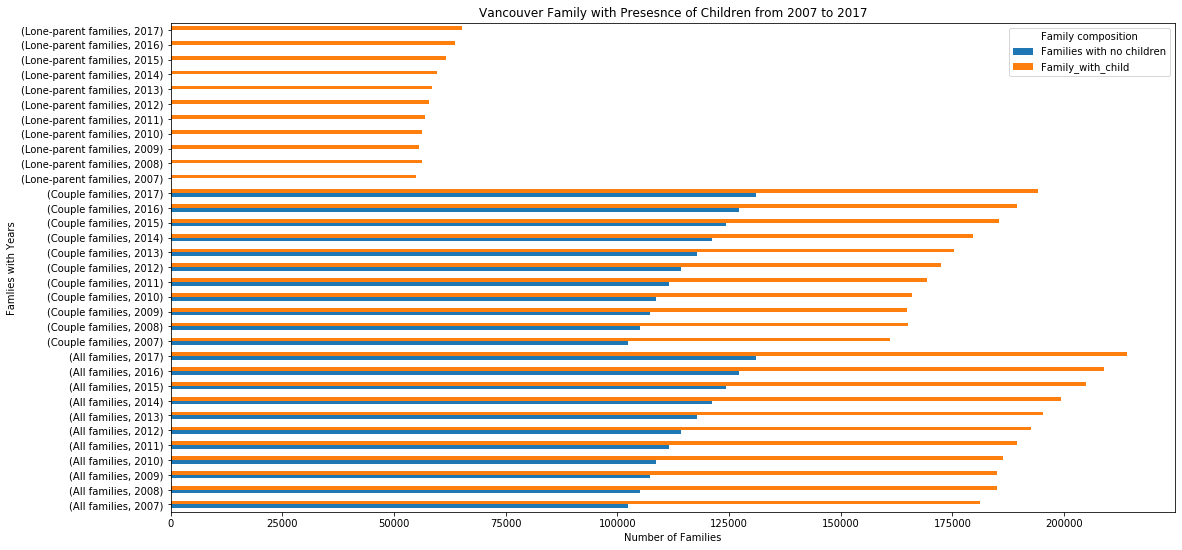

In [48]:
vancouver_child_df = vancouver_df.drop(['Families with 1 child', 'Families with 2 children', 'Families with 3 or more children'], axis =1)
ax11 = vancouver_child_df.plot(kind ='barh',figsize = (18,9))
ax11.set_ylabel("Famlies with Years")
ax11.set_xlabel("Number of Families")
ax11.set_title("Vancouver Family with Presesnce of Children from 2007 to 2017")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

* Toronto Family with `presence of children` from `2007 to 2017`

In [49]:
toronto_df=pd.pivot_table(df_ton, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
toronto_df['Family_with_child'] = toronto_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)


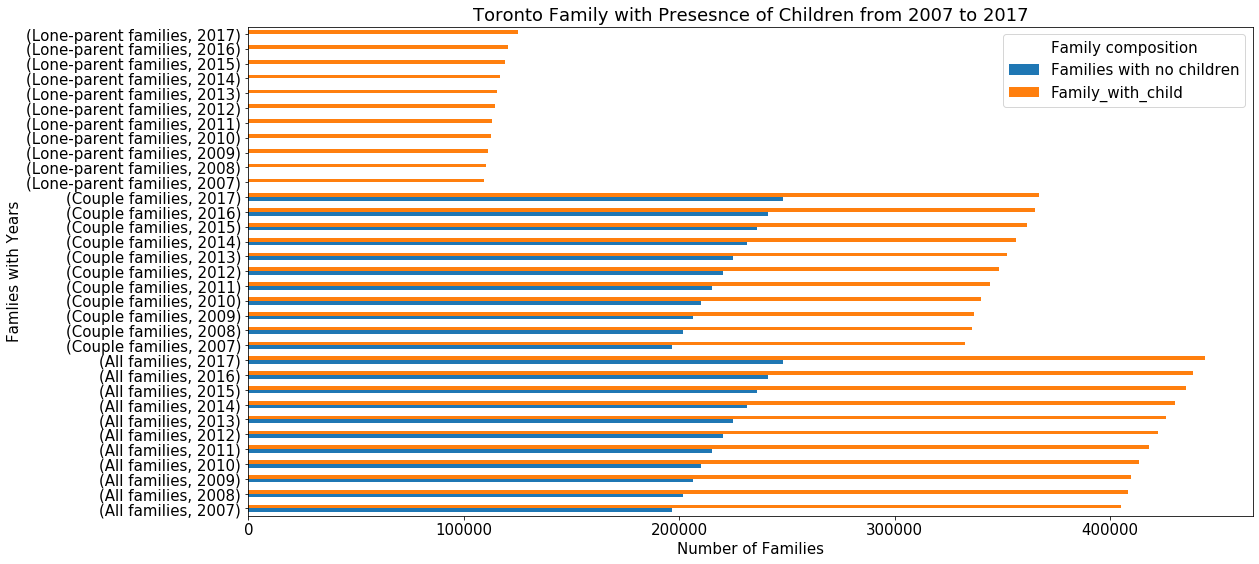

In [50]:
toronto_child_df = toronto_df.drop(['Families with 1 child', 'Families with 2 children', 'Families with 3 or more children'], axis =1)
ax13 = toronto_child_df.plot(kind ='barh',figsize = (18,9))
ax13.set_ylabel("Famlies with Years")
ax13.set_xlabel("Number of Families")
ax13.set_title("Toronto Family with Presesnce of Children from 2007 to 2017")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

* `Calgary` with `presence of Children` from   `2007 to 2017`

In [51]:
calgary_df=pd.pivot_table(df_cal, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
calgary_df['Family_with_child'] = calgary_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)

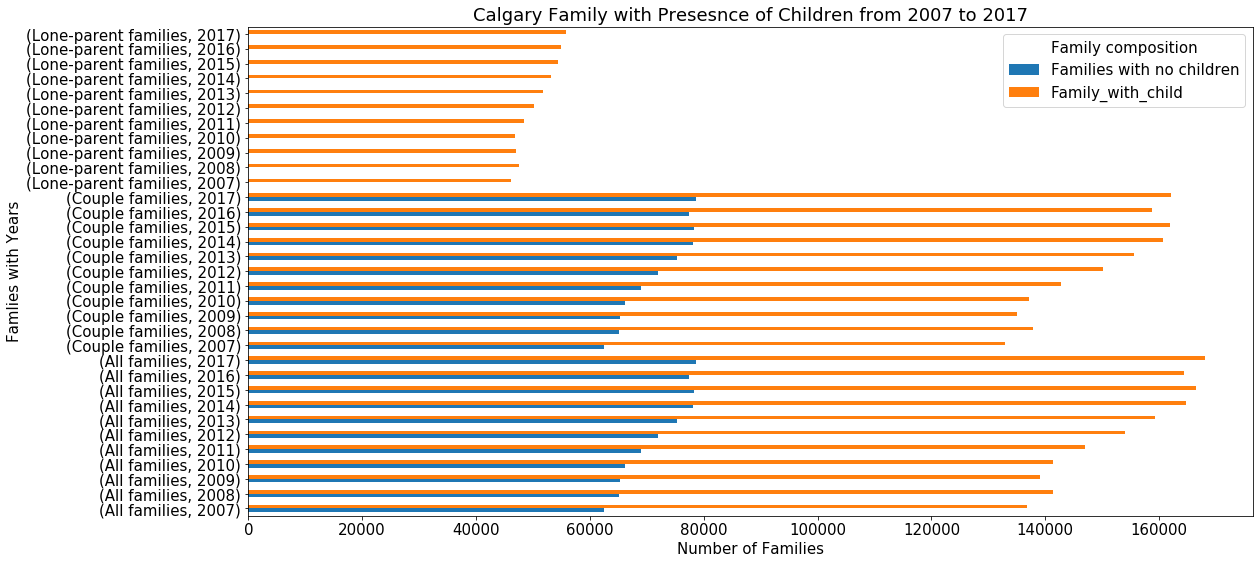

In [52]:
calgary_child_df = calgary_df.drop(['Families with 1 child', 'Families with 2 children', 'Families with 3 or more children'], axis =1)
ax12 = calgary_child_df.plot(kind ='barh',figsize = (18,9))
ax12.set_ylabel("Famlies with Years")
ax12.set_xlabel("Number of Families")
ax12.set_title("Calgary Family with Presesnce of Children from 2007 to 2017")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

* **Income and  Families with or without Children**
* Children are tax filers or imputed persons in couple and lone-parent families
* Tax filing children do not live with their spouse, have no children of their own and live with their parent(s)

`Vancouver` * **Income Exploration**
* Lone families without children median income is not given but `Families with or without children` is given so we use that 
    `income` for `Lone families without children`

In [53]:
df1_van = family_vancouver.loc[(family_vancouver['Family type']=='Lone-parent families') &

                     (family_vancouver['Parent characteristics']=='Median total income')]
van_lon_df=pd.pivot_table(df1_van, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
van_lon_df['Family_with_child'] = van_lon_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
van_lon_df.head(2)

Family composition             Average size of families with children  \
Family type          REF_DATE                                           
Lone-parent families 2007                                     37070.0   
                     2008                                     38860.0   

Family composition             Families with 1 child  \
Family type          REF_DATE                          
Lone-parent families 2007                    36980.0   
                     2008                    38730.0   

Family composition             Families with 2 children  \
Family type          REF_DATE                             
Lone-parent families 2007                       38420.0   
                     2008                       40430.0   

Family composition             Families with 3 or more children  \
Family type          REF_DATE                                     
Lone-parent families 2007                               34080.0   
                     2008                               35690.0   

Family composition             Families with or without children  \
Family type          REF_DATE                                      
Lone-parent families 2007                                37070.0   
                     2008                                38860.0   

Family composition             Family_with_child  
Family type          REF_DATE                     
Lone-parent families 2007               109480.0  
                     2008               114850.0

In [54]:
vancouver_lon_df = van_lon_df.drop(['Average size of families with children','Families with 1 child','Families with 2 children'
                ,'Families with 3 or more children'], axis = 1)


In [55]:

vancouver_lon_df =vancouver_lon_df.rename(columns = {'Families with or without children':'Families_without_children'})

Text(0.5, 1.0, 'Vancouver Lone-Parent Income (2007-2016)')

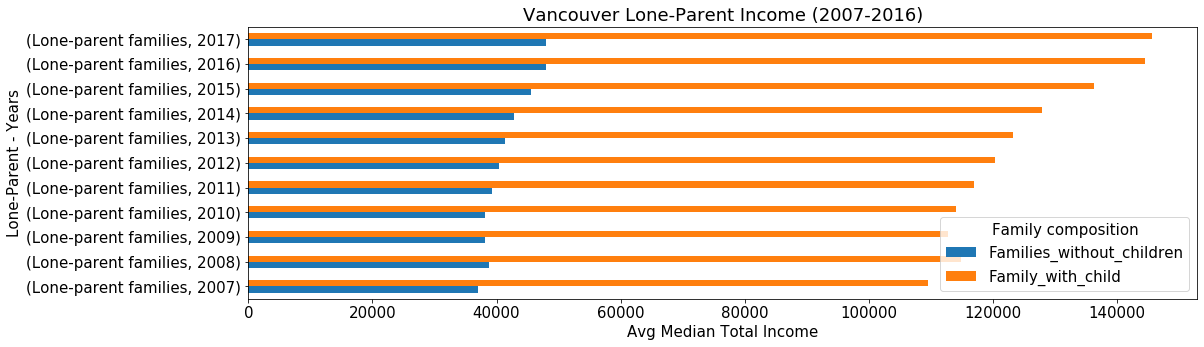

In [56]:
ax_van = vancouver_lon_df.plot(kind = 'barh',  figsize = (17,5))
ax_van.set_xlabel("Avg Median Total Income")
ax_van.set_ylabel("Lone-Parent - Years")
ax_van.set_title("Vancouver Lone-Parent Income (2007-2016)") 

* `Toronto`
* Lone-Parent Income exploration

In [57]:
df1_ton = family_toronto.loc[(family_toronto['Family type']=='Lone-parent families') &

                     (family_toronto['Parent characteristics']=='Median total income')]
ton_lon_df=pd.pivot_table(df1_ton, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
ton_lon_df['Family_with_child'] = ton_lon_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
ton_lon_df.head(2)

Family composition             Average size of families with children  \
Family type          REF_DATE                                           
Lone-parent families 2007                                     37090.0   
                     2008                                     38380.0   

Family composition             Families with 1 child  \
Family type          REF_DATE                          
Lone-parent families 2007                    36690.0   
                     2008                    37840.0   

Family composition             Families with 2 children  \
Family type          REF_DATE                             
Lone-parent families 2007                       38540.0   
                     2008                       39750.0   

Family composition             Families with 3 or more children  \
Family type          REF_DATE                                     
Lone-parent families 2007                               36000.0   
                     2008                               37660.0   

Family composition             Families with or without children  \
Family type          REF_DATE                                      
Lone-parent families 2007                                37090.0   
                     2008                                38380.0   

Family composition             Family_with_child  
Family type          REF_DATE                     
Lone-parent families 2007               111230.0  
                     2008               115250.0

In [58]:
toronto_lon_df = ton_lon_df.drop(['Average size of families with children','Families with 1 child','Families with 2 children'
                ,'Families with 3 or more children'], axis = 1)

In [59]:
toronto_lon_df =toronto_lon_df.rename(columns = {'Families with or without children':'Families_without_children'})

Text(0.5, 1.0, 'Toronto Lone-Parent Income (2007-2016)')

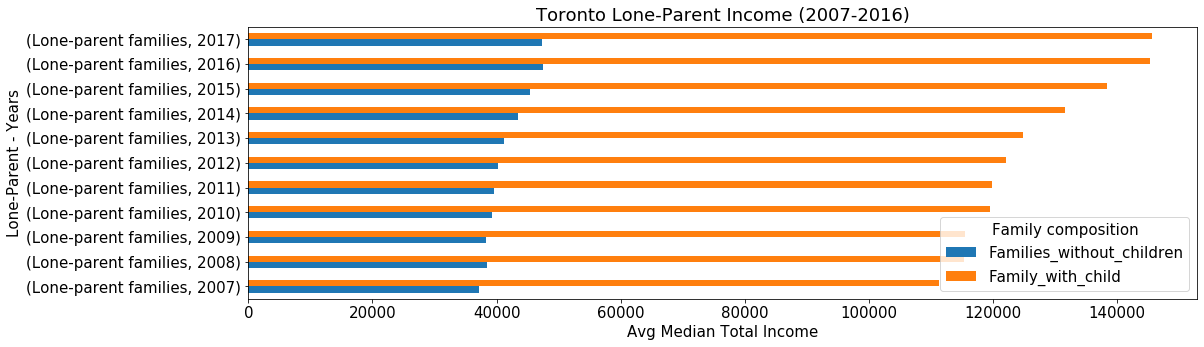

In [60]:
ax_ton = toronto_lon_df.plot(kind = 'barh',  figsize = (17,5))
ax_ton.set_xlabel("Avg Median Total Income")
ax_ton.set_ylabel("Lone-Parent - Years")
ax_ton.set_title("Toronto Lone-Parent Income (2007-2016)") 

* Calgary
* `lone-Parent` **Income Exploration**

In [61]:
df1_cal = family_calgary.loc[(family_calgary['Family type']=='Lone-parent families') &

                     (family_calgary['Parent characteristics']=='Median total income')]
cal_lon_df=pd.pivot_table(df1_cal, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
cal_lon_df['Family_with_child'] = cal_lon_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
cal_lon_df.head(2)

Family composition             Average size of families with children  \
Family type          REF_DATE                                           
Lone-parent families 2007                                     44770.0   
                     2008                                     46770.0   

Family composition             Families with 1 child  \
Family type          REF_DATE                          
Lone-parent families 2007                    45230.0   
                     2008                    47330.0   

Family composition             Families with 2 children  \
Family type          REF_DATE                             
Lone-parent families 2007                       46500.0   
                     2008                       48430.0   

Family composition             Families with 3 or more children  \
Family type          REF_DATE                                     
Lone-parent families 2007                               38730.0   
                     2008                               40080.0   

Family composition             Families with or without children  \
Family type          REF_DATE                                      
Lone-parent families 2007                                44770.0   
                     2008                                46770.0   

Family composition             Family_with_child  
Family type          REF_DATE                     
Lone-parent families 2007               130460.0  
                     2008               135840.0

In [62]:
calgary_lon_df = cal_lon_df.drop(['Average size of families with children','Families with 1 child','Families with 2 children'
                ,'Families with 3 or more children'], axis = 1)

In [63]:
calgary_lon_df =calgary_lon_df.rename(columns = {'Families with or without children':'Families_without_children'})

Text(0.5, 1.0, 'Calgary Lone-Parent Income (2007-2016)')

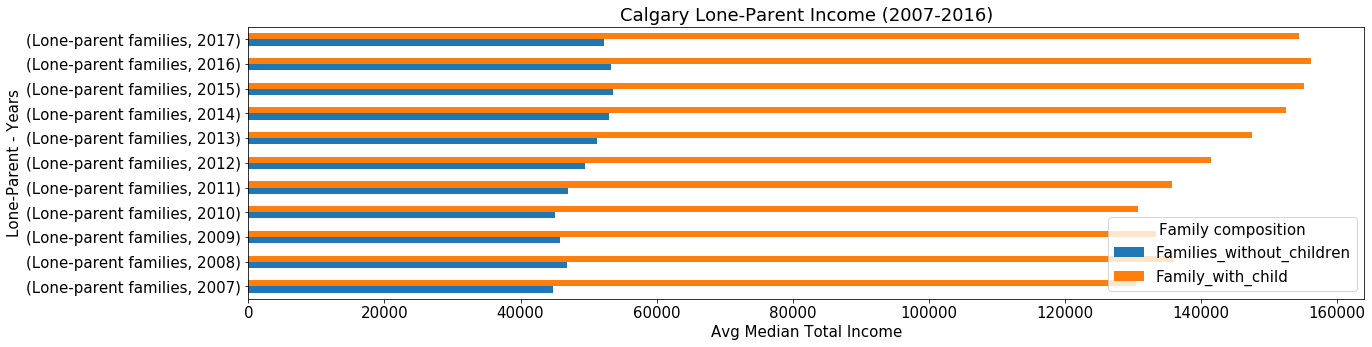

In [64]:
ax_cal = calgary_lon_df.plot(kind = 'barh',  figsize = (20,5))
ax_cal.set_xlabel("Avg Median Total Income")
ax_cal.set_ylabel("Lone-Parent - Years")
ax_cal.set_title("Calgary Lone-Parent Income (2007-2016)") 

**Lone parents without children income range is between 40,000 to 46000**


 **Lone parents tend to buy small houses like condominium(2 or more bedroom) this dataset also repersenting that lone parents are earning less as compare to Couple parents and this dataset also represent that Couple parents are increasing with passage of time but not much increase in Lone Parents with passage of time.**

**Toronto Housing analysis**:a larger proportion of children live in lone parent families in Toronto 
 `To suitably house lone-parent families, at least 2-bedroom units are required, which presents affordability challenges due to (at most) a single income earner competing with couples (with and without children) for same size of units`

* Calgary
* `Couple-Families` Income Exploration

In [65]:
df22_cal = family_calgary.loc[(family_calgary['Family type']=='Couple families') &

                     (family_calgary['Parent characteristics']=='Median total income')]
cal_cou_df=pd.pivot_table(df22_cal, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
cal_cou_df['Family_with_child'] = cal_cou_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
cal_cou_df.head(2)

Family composition        Average family size  \
Family type     REF_DATE                        
Couple families 2007                  95160.0   
                2008                  99000.0   

Family composition        Average size of families with children  \
Family type     REF_DATE                                           
Couple families 2007                                    107470.0   
                2008                                    112870.0   

Family composition        Families with 1 child  Families with 2 children  \
Family type     REF_DATE                                                    
Couple families 2007                    99220.0                  115060.0   
                2008                   105560.0                  120990.0   

Family composition        Families with 3 or more children  \
Family type     REF_DATE                                     
Couple families 2007                              108990.0   
                2008                              111130.0   

Family composition        Families with no children  \
Family type     REF_DATE                              
Couple families 2007                        80880.0   
                2008                        82670.0   

Family composition        Families with or without children  Family_with_child  
Family type     REF_DATE                                                        
Couple families 2007                                95160.0           323270.0  
                2008                                99000.0           337680.0

In [66]:
calgary_cou_df = cal_cou_df.drop(['Average family size','Average size of families with children','Families with 1 child',
                                  'Families with 2 children','Families with 3 or more children', 
                                 'Families with or without children'], axis = 1)

Text(0.5, 1.0, 'Calgary Couple Family Income (2007-2016)')

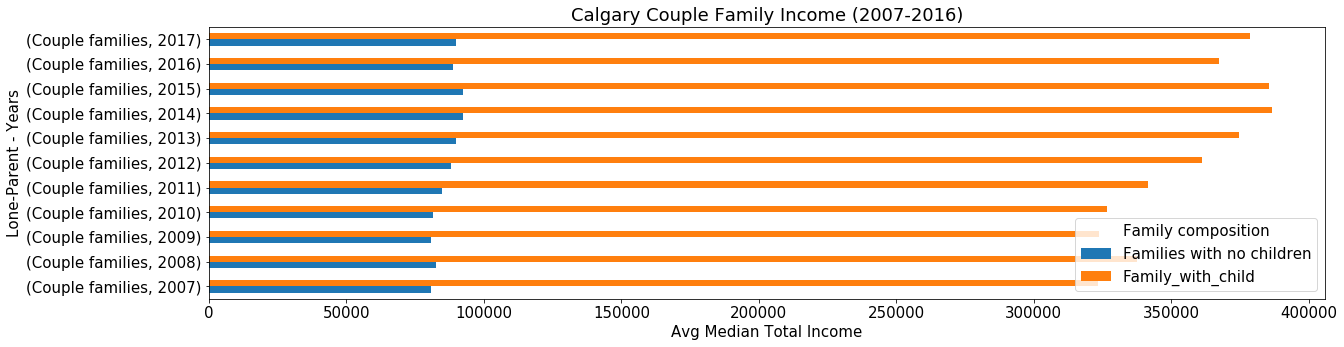

In [67]:
ax23_cal = calgary_cou_df.plot(kind = 'barh',  figsize = (20,5))
ax23_cal.set_xlabel("Avg Median Total Income")
ax23_cal.set_ylabel("Lone-Parent - Years")
ax23_cal.set_title("Calgary Couple Family Income (2007-2016)") 

* The graph shows that in Calgary Couple families earning range without children is more than Lone-parent without children
*`range`* `70,000 to 75000 appox.` and also `couple-families Income range with children` is very high as compare to `Lone-Parent with Children`

* Toronto
* `Couple-Families` Income Exploration

In [68]:
df24_ton = family_toronto.loc[(family_toronto['Family type']=='Couple families') &
                                                         (family_toronto['Parent characteristics']=='Median total income')]
cou_ton_df=pd.pivot_table(df24_ton, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
cou_ton_df['Family_with_child'] = cou_ton_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
cou_ton_df.head(2)

Family composition        Average family size  \
Family type     REF_DATE                        
Couple families 2007                  73970.0   
                2008                  75630.0   

Family composition        Average size of families with children  \
Family type     REF_DATE                                           
Couple families 2007                                     84560.0   
                2008                                     87070.0   

Family composition        Families with 1 child  Families with 2 children  \
Family type     REF_DATE                                                    
Couple families 2007                    79720.0                   89740.0   
                2008                    82290.0                   92540.0   

Family composition        Families with 3 or more children  \
Family type     REF_DATE                                     
Couple families 2007                               83550.0   
                2008                               85430.0   

Family composition        Families with no children  \
Family type     REF_DATE                              
Couple families 2007                        57630.0   
                2008                        58570.0   

Family composition        Families with or without children  Family_with_child  
Family type     REF_DATE                                                        
Couple families 2007                                73970.0           253010.0  
                2008                                75630.0           260260.0

Text(0.5, 1.0, 'Toronto Couple Family Income (2007-2016)')

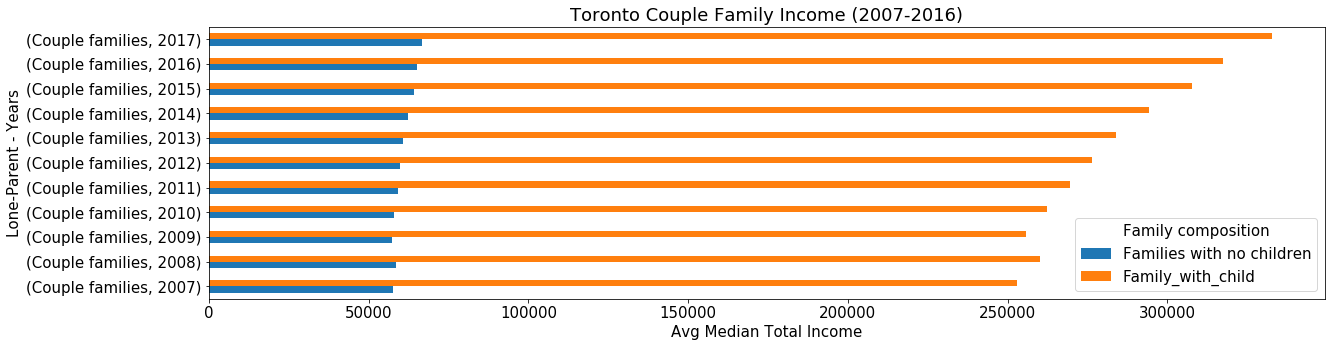

In [69]:
toronto_cou_df = cou_ton_df.drop(['Average family size','Average size of families with children','Families with 1 child',
                                  'Families with 2 children','Families with 3 or more children', 
                                 'Families with or without children'], axis = 1)

ax23_ton = toronto_cou_df.plot(kind = 'barh',  figsize = (20,5))
ax23_ton.set_xlabel("Avg Median Total Income")
ax23_ton.set_ylabel("Lone-Parent - Years")
ax23_ton.set_title("Toronto Couple Family Income (2007-2016)") 

* Vancouver
* `Couple-Families` Income Exploration

In [70]:

df24_van = family_vancouver.loc[(family_vancouver['Family type']=='Couple families') &
                                                         (family_vancouver['Parent characteristics']=='Median total income')]
cou_van_df=pd.pivot_table(df24_van, index = ['Family type', 'REF_DATE'],columns = 'Family composition',
                               values = 'VALUE' )
cou_van_df['Family_with_child'] = cou_van_df.apply(lambda row: row['Families with 1 child'] +
                                                          row['Families with 2 children'] +
                                                          row['Families with 3 or more children']
                                                          , axis=1)
cou_van_df.head(2)

Family composition        Average family size  \
Family type     REF_DATE                        
Couple families 2007                  71850.0   
                2008                  74270.0   

Family composition        Average size of families with children  \
Family type     REF_DATE                                           
Couple families 2007                                     81080.0   
                2008                                     84140.0   

Family composition        Families with 1 child  Families with 2 children  \
Family type     REF_DATE                                                    
Couple families 2007                    75420.0                   85440.0   
                2008                    78130.0                   89180.0   

Family composition        Families with 3 or more children  \
Family type     REF_DATE                                     
Couple families 2007                               84850.0   
                2008                               87970.0   

Family composition        Families with no children  \
Family type     REF_DATE                              
Couple families 2007                        61320.0   
                2008                        63000.0   

Family composition        Families with or without children  Family_with_child  
Family type     REF_DATE                                                        
Couple families 2007                                71850.0           245710.0  
                2008                                74270.0           255280.0

Text(0.5, 1.0, 'Vancouver Couple Family Income (2007-2016)')

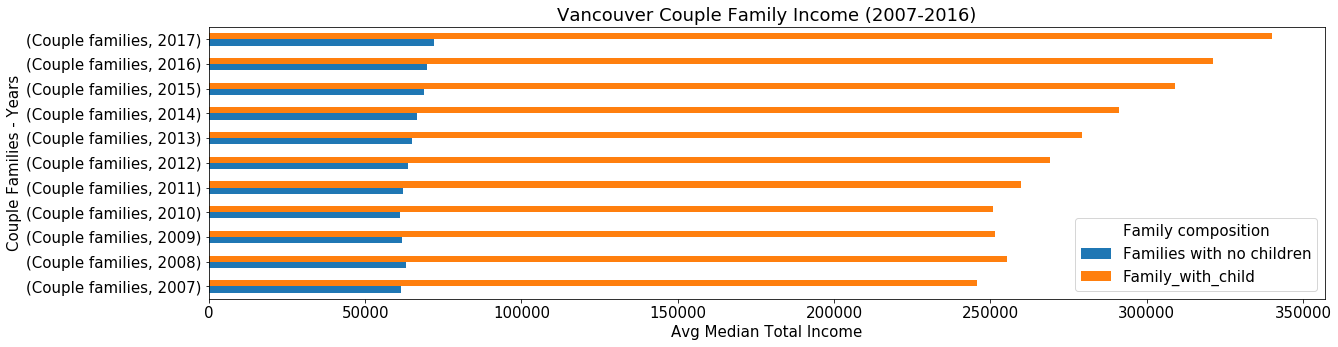

In [71]:
vancouver_cou_df = cou_van_df.drop(['Average family size','Average size of families with children','Families with 1 child',
                                  'Families with 2 children','Families with 3 or more children', 
                                 'Families with or without children'], axis = 1)

ax24_van = vancouver_cou_df.plot(kind = 'barh',  figsize = (20,5))
ax24_van.set_xlabel("Avg Median Total Income")
ax24_van.set_ylabel("Couple Families - Years")
ax24_van.set_title("Vancouver Couple Family Income (2007-2016)") 

** in All  3 cities (Toronto, Vancouver, Calgary) `Couple families with children` are earning with range *250000 to 3400000*
but `Lone-families with children` range is only from *130000 to 1600000*

**Age Groups**

`Toronto`Family Exploration Older Partner or Parent.
`

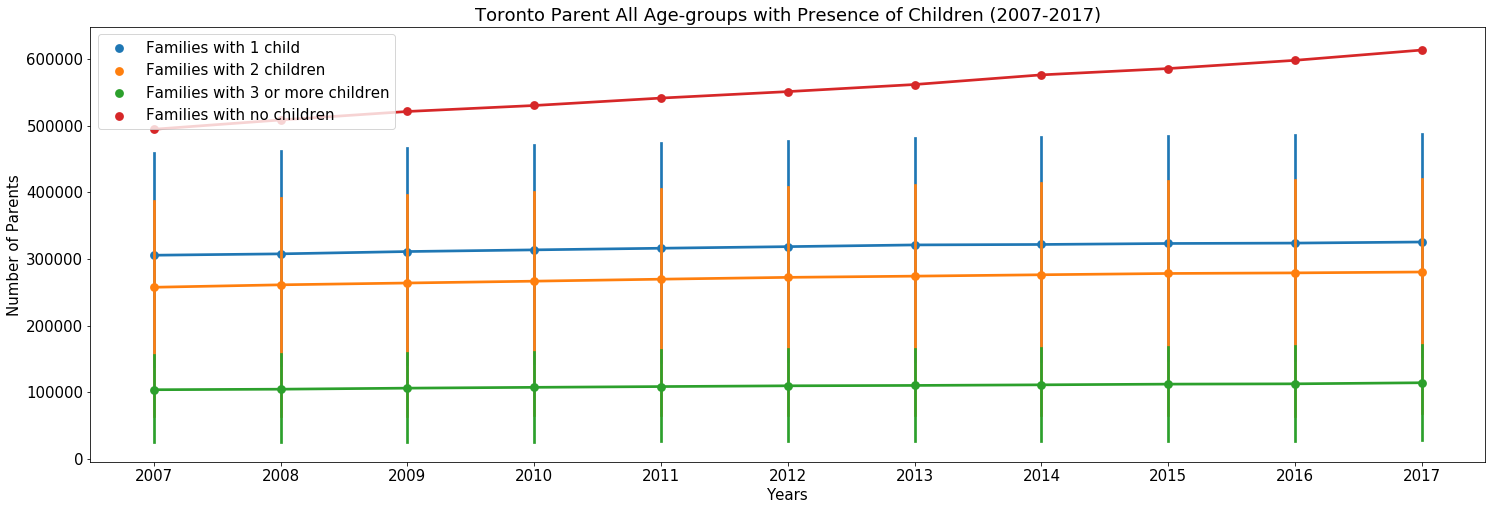

In [89]:
df_ton_age = df_ton.loc[(df_ton['Parent characteristics']!='Median total income') 
                        & (df_ton['Parent characteristics']=='All parental age groups')]

plt.figure(figsize=(25,8))
import seaborn as sns
ax = sns.pointplot(x ='REF_DATE', y = 'VALUE',hue='Family composition',data = df_ton_age)
ax.set_title("Toronto Parent All Age-groups with Presence of Children (2007-2017)")
ax.set_ylabel("Number of Parents")
ax.set_xlabel("Years")
ax.legend(loc='best')

`Conclusion` Parents of All ages with `No Children` are growing fast as compare to Parents `with Children` in City `Toronto`


`Vancouver`Family Exploration Older Partner or Parent

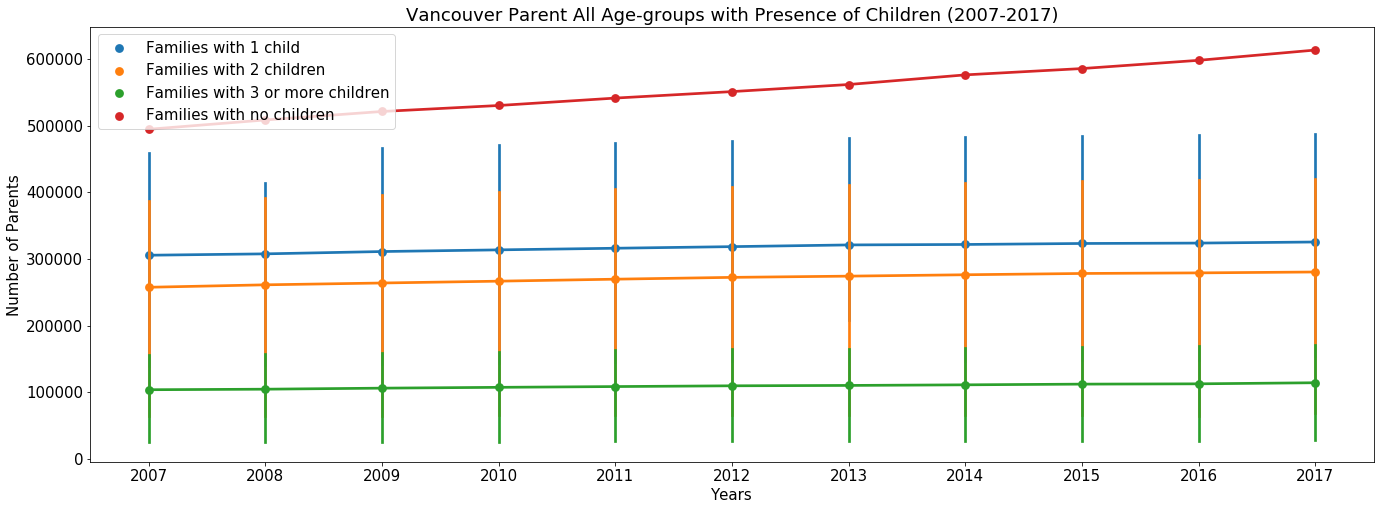

In [73]:

df_van_age = df_van.loc[(df_van['Parent characteristics']!='Median total income') 
                        & (df_van['Parent characteristics']=='All parental age groups')]

plt.figure(figsize=(23,8))
import seaborn as sns
ax = sns.pointplot(x ='REF_DATE', y = 'VALUE',hue='Family composition',data = df_ton_age)
ax.set_title("Vancouver Parent All Age-groups with Presence of Children (2007-2017)")
ax.set_ylabel("Number of Parents")
ax.set_xlabel("Years")
ax.legend(loc='best')
plt.show()

In [74]:
df_cal_age = df_cal.loc[(df_cal['Parent characteristics']!='Median total income') 
                        & (df_cal['Parent characteristics']=='All parental age groups')]

plt.figure(figsize=(23,8))
import seaborn as sns
c

NameError: name 'c' is not defined

<Figure size 1656x576 with 0 Axes>

`Conclusion` All 3 Cities `Parents with no Children` are growing fast from `2007 to 2017` as compare to `Parents with Children`

`Parent-group`--->  `Couple` and `Lone` Families ------> * **(Toronto , Calgary, Vancouver )** * 

In [ ]:
plt.figure(figsize=(23,8))
import seaborn as sns
ax = sns.pointplot(x ='REF_DATE', y = 'VALUE',hue='Family type',data = df_ton_age)
sns.color_palette('colorblind')
ax.set_title("Toronto Couple and Lone-Parent of All Age-groups (2007-2017)")
ax.set_ylabel("Number of Parents")
ax.set_xlabel("Years")
ax.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(23,8))
import seaborn as sns
ax = sns.pointplot(x ='REF_DATE', y = 'VALUE',hue='Family type',data = df_van_age)
sns.color_palette('colorblind')
ax.set_title("Calgary Couple and Lone-Parent of All Age-groups (2007-2017)")
ax.set_ylabel("Number of Parents")
ax.set_xlabel("Years")
ax.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(23,11))
import seaborn as sns
ax = sns.pointplot(x ='REF_DATE', y = 'VALUE',hue='Family type',data = df_cal_age)
sns.color_palette('colorblind')
ax.set_title("Calgary Couple and Lone-Parent of All Age-groups (2007-2017)")
ax.set_ylabel("Number of Parents")
ax.set_xlabel("Years")
ax.legend(loc='best')
plt.show()

`Concluion` Couple Families are showing upward trend in all cities. Graph clearly shows this.

In [88]:
ton_child_nochild =family_toronto.loc[(family_toronto['Family type']=='Couple families') & 
                                      
                   (family_toronto['Family composition']=='Families with or without children')]
ton_child_nochild

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
1144,2007,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1265760.0
1145,2008,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1287680.0
1146,2009,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1309490.0
1147,2010,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1325490.0
1148,2011,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1345230.0
1149,2012,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1362740.0
1150,2013,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1379950.0
1151,2014,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1400550.0
1152,2015,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1414960.0
1153,2016,"Toronto, Ontario",Couple families,Families with or without children,All parental age groups,1431290.0


In [85]:
family['Family type'].value_counts()

All families            1820
Couple families         1820
Lone-parent families    1300
Name: Family type, dtype: int64

In [ ]:
Then we can take Couple Families (Families With or Without Children) and Lone-Parent  (Families With or Without Children)
as a proportion of All Families (Families With or Without Children) each year to see whether there are more couples or lone-parents over time.